In [2]:
import numpy as np
from scipy import linalg
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

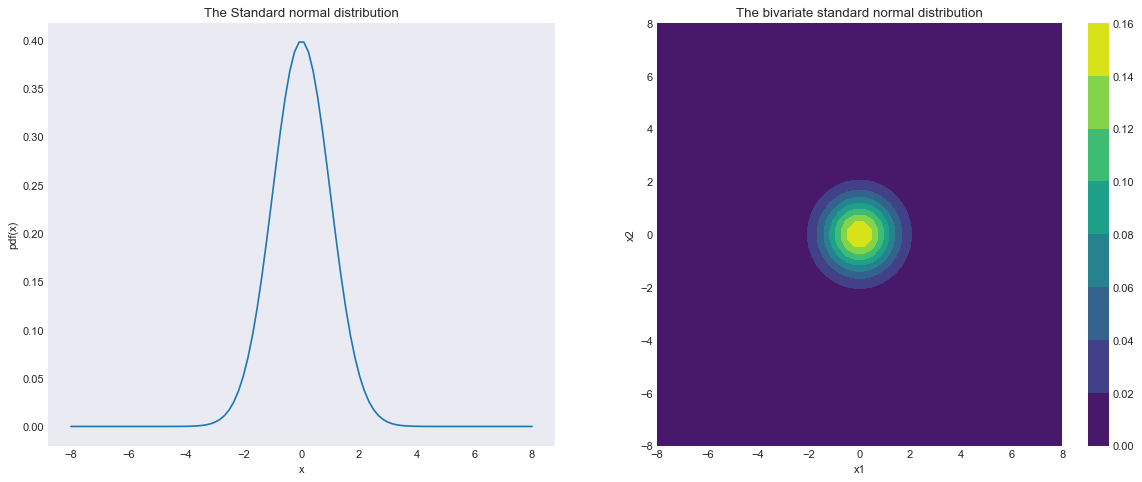

In [75]:
bf1=plt.figure(figsize=(18, 7), dpi=80)
# 1. Subplot: Normal distribution
ax1 = plt.subplot(121)

#Scale
x_ticks1=np.linspace(-8,8,9)
y_ticks1=np.linspace(0,0.40,9)

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 8*sigma, mu + 8*sigma, 100)

plt.title("The Standard normal distribution")
plt.xticks(ticks=x_ticks1)
plt.yticks(ticks=y_ticks1)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.xlabel("x") 
plt.ylabel("pdf(x)") 

# 2. Subplot: sin(exp(x))

ax2 = plt.subplot(122)

# Initializing the random seed
random_seed=1000
 
# List containing the variance
# covariance values
cov_val = [0]
 
# Setting mean of the distributino
# to be at (0,0)
mean = np.array([0,0])
 
# Storing density function values for
# further analysis
pdf_list = []
 
# Iterating over different covariance values
for val in cov_val:
     
    # Initializing the covariance matrix
    cov = np.array([[1, val], [val, 1]])
     
    # Generating a Gaussian bivariate distribution
    # with given mean and covariance matrix
    distr = multivariate_normal(cov = cov, mean = mean,
                                seed = random_seed)
     
    # Generating a meshgrid complacent with
    # the 3-sigma boundary
    mean_1, mean_2 = mean[0], mean[1]
    sigma_1, sigma_2 = cov[0,0], cov[1,1]
     
    x = np.linspace(-8*sigma_1, 8*sigma_1, num=50)
    y = np.linspace(-8*sigma_2, 8*sigma_2, num=50)
    X, Y = np.meshgrid(x,y)
     
    # Generating the density function
    # for each point in the meshgrid
    pdf = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])
     
    pdf_list.append(pdf)
 
 
# Plotting contour plots
for val in pdf_list:
    plt.contourf(X, Y, val, cmap='viridis')
    plt.xlabel("x1")
    plt.ylabel("x2")
    # plt.title(f'Covariance between x1 and x2 = {cov_val[idx]}')


plt.colorbar()
plt.title("The bivariate standard normal distribution")
plt.show()


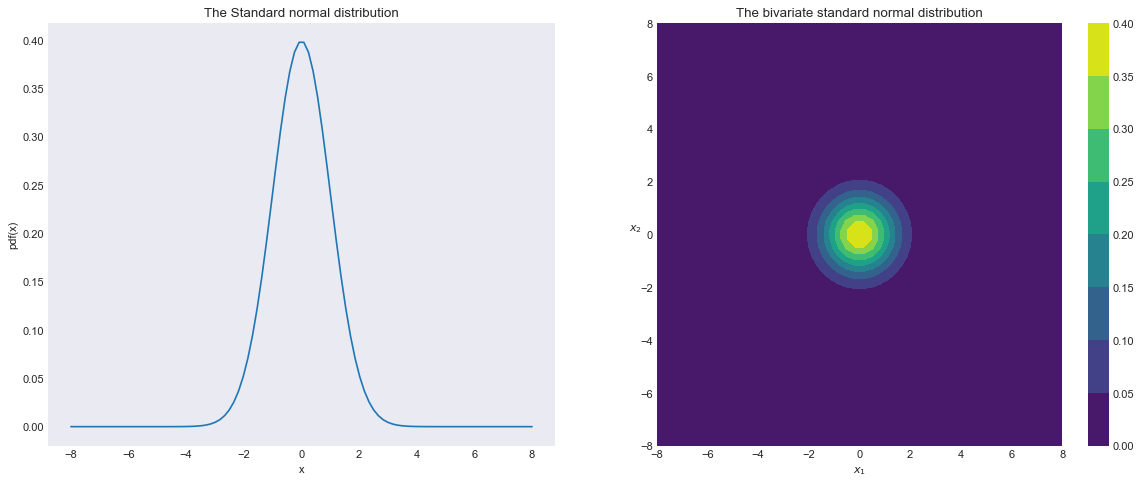

In [74]:
f1=plt.figure(figsize=(18, 7), dpi=80)
# 1. Subplot: Normal distribution
ax1 = plt.subplot(121)

#Scale
x_ticks1=np.linspace(-8,8,9)
y_ticks1=np.linspace(0,0.40,9)

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 8*sigma, mu + 8*sigma, 100)

plt.title("The Standard normal distribution")
plt.xticks(ticks=x_ticks1)
plt.yticks(ticks=y_ticks1)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.xlabel("x") 
plt.ylabel("pdf(x)") 

# 2. Subplot: Bivariate standard normal distribution

ax2 = plt.subplot(122)

x=y=np.linspace(-8,8,50, endpoint=True)
xx,yy=np.meshgrid(x,y)
z=1/(sigma*np.sqrt(np.pi*2))*np.exp(-(xx**2+yy**2)/(2*sigma))
h=plt.contourf(x,y,z, cmap='viridis')
ax_cbar=plt.colorbar
plt.xlabel('$x_1$')
plt.ylabel('$x_2$', rotation='horizontal')
# ax_cbar.set_label('$pdf(x_1,x_2)$')
plt.title('The bivariate standard normal distribution')
plt.colorbar()


plt.show()

In [160]:
#a) Read the data contained in the file applesOranges.csv.
expdat = np.genfromtxt(fname='applesOranges.csv', delimiter=',',dtype=np.float, skip_header=1)
expdat

/var/folders/qg/bvmbx8kx66v9dn0hmz5f07780000gq/T/ipykernel_4077/4098411912.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  expdat = np.genfromtxt(fname='applesOranges.csv', delimiter=',',dtype=np.float, skip_header=1)


array([[ 3.650e-01,  7.080e-01,  0.000e+00],
       [ 5.430e-01, -2.680e-01,  0.000e+00],
       [-4.010e-01,  6.430e-01,  0.000e+00],
       [ 8.660e-01, -7.960e-01,  0.000e+00],
       [-3.860e-01,  7.420e-01,  0.000e+00],
       [-4.430e-01,  6.150e-01,  0.000e+00],
       [-5.190e-01,  8.180e-01,  0.000e+00],
       [ 3.320e-01, -2.110e-01,  0.000e+00],
       [ 2.110e-01, -2.370e-01,  0.000e+00],
       [-2.080e-01, -6.560e-01,  0.000e+00],
       [-2.800e-02,  4.400e-02,  0.000e+00],
       [-2.710e-01,  5.000e-03,  0.000e+00],
       [ 1.590e-01, -7.390e-01,  0.000e+00],
       [ 1.620e-01, -5.300e-01,  0.000e+00],
       [-5.180e-01,  2.630e-01,  0.000e+00],
       [ 7.450e-01, -3.550e-01,  0.000e+00],
       [-1.151e+00,  1.133e+00,  0.000e+00],
       [ 6.860e-01, -6.640e-01,  0.000e+00],
       [-1.221e+00,  9.620e-01,  0.000e+00],
       [ 1.280e-01, -6.300e-02,  0.000e+00],
       [ 1.001e+00, -9.560e-01,  0.000e+00],
       [-8.070e-01,  1.015e+00,  0.000e+00],
       [-1

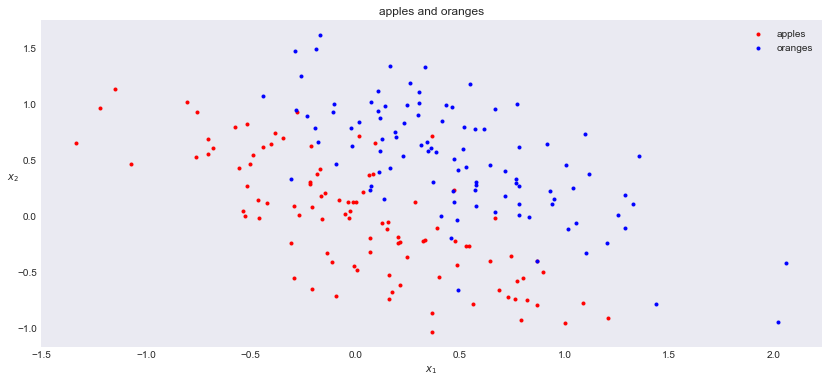

In [172]:
#b)Produce a 2D scatter plot for x. Use different markers to distinguish “apple” points from “orange” points. Add a legend to your plot.
x = expdat[:,:2]
y = expdat[:,-1]

plt.scatter(x[y==0,0], x[y==0,1], marker='.', c='r', label='apples')
plt.scatter(x[y==1,0], x[y==1,1], marker='.', c='b', label='oranges')

lgd = plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$', rotation='horizontal')
plt.title("apples and oranges")
plt.show()

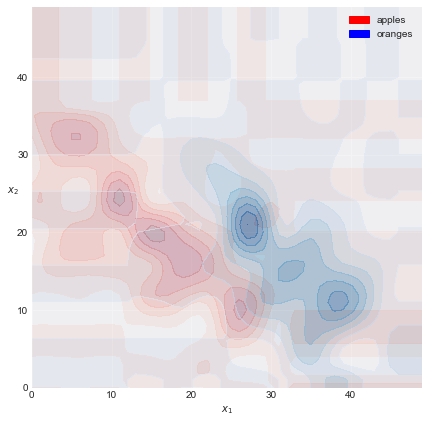

In [181]:
#Visualizetheconditionaldensitiesfor“apples”and“oranges”separately(i.e.P(x|yT =0)
#and P(x|yT = 1) by:

from scipy.interpolate import interp2d

def binedges2center(edges_x, edges_y):
    xcenters = (edges_x[:-1] + edges_x[1:]) / 2.
    ycenters = (edges_y[:-1] + edges_y[1:]) / 2.
    return xcenters, ycenters
    
    
hist_0, bin_edges_x_0, bin_edges_y_0 = np.histogram2d(x[y==0,0], x[y==0,1], bins=10, density=True)
hist_1, bin_edges_x_1, bin_edges_y_1 = np.histogram2d(x[y==1,0], x[y==1,1], bins=10, density=True)

bins_x_0, bins_y_1 = binedges2center(bin_edges_x_0, bin_edges_y_0)
bins_x_1, bins_y_1 = binedges2center(bin_edges_x_1, bin_edges_y_1)

fig, ax = plt.subplots(1, figsize=[7,7])
# min and max values in all directions

vmax = max(np.abs(hist_0).max(), np.abs(hist_1).max())
xmin = min(bin_edges_x_0.min(), bin_edges_x_1.min())
xmax = max(bin_edges_x_0.max(), bin_edges_x_1.max())
ymin = min(bin_edges_y_0.min(), bin_edges_y_1.min())
ymax = max(bin_edges_y_0.max(), bin_edges_y_1.max())
    
# interpolate for smoother density-like plot
xi2 = np.linspace(xmin, xmax, 50)
yi2 = np.linspace(ymin, ymax, 50)
f = interp2d(bin_edges_x_0[:-1], bin_edges_y_0[:-1], hist_0, kind='cubic')
hist_0_smooth = f(xi2, yi2)
f = interp2d(bin_edges_x_1[:-1], bin_edges_y_1[:-1], hist_1, kind='cubic')
hist_1_smooth = f(xi2, yi2)

step = 0.0001
levels = np.arange(0.0, vmax, step) + step
cmap = plt.cm.Reds

# proxy = [plt.Rectangle((0,0),1,1, fc=cmap(1)]
ax.contourf(hist_0_smooth, cmap=cmap, alpha=0.5)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$', rotation='horizontal')
cmap = plt.cm.Blues 

# proxy.append(plt.Rectangle((0,0),1,1, fc=cmap(1)))
ct = ax.contourf(hist_1_smooth, cmap=cmap, alpha=0.5)
plt.grid()

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='apples')
blue_patch = mpatches.Patch(color='blue', label='oranges')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

/Users/MATEO./opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/MATEO./opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/MATEO./opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg

<Figure size 1008x432 with 0 Axes>

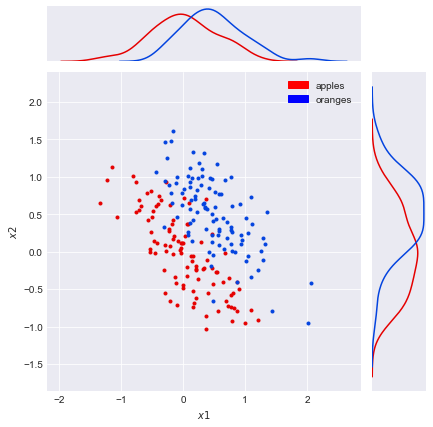

<Figure size 1008x432 with 0 Axes>

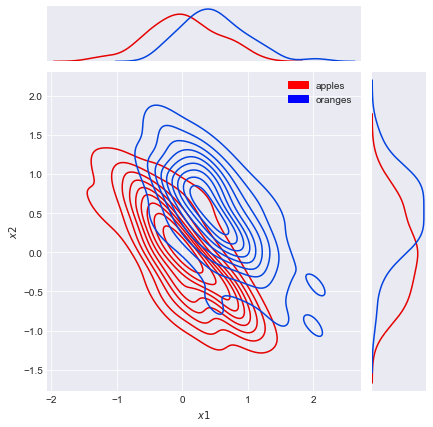

In [186]:
import seaborn as sns
import pandas as pd

def visualize(df, joint_plot=plt.scatter):
    plt.figure()
    df0 = df[df.y==0]
    df1 = df[df.y==1]
    g = sns.JointGrid(x=df0.x1, y=df0.x2)   
    g = g.plot_joint(joint_plot, marker='.')
    g.ax_joint.grid()
    g.ax_joint.set_xlabel('$'+g.ax_joint.get_xlabel()+'$')
    g.ax_joint.set_ylabel('$'+g.ax_joint.get_ylabel()+'$')
    g = g.plot_marginals(sns.kdeplot)
    # Now the other class
    g.x = df1.x1
    g.y = df1.x2
    g = g.plot_joint(joint_plot, marker='.')
    g.ax_joint.grid()
    g = g.plot_marginals(sns.distplot,kde=True,hist=False,)
    g.ax_marg_x.set_xlabel('')
    g.ax_marg_y.set_ylabel('')
    g.ax_joint.grid()
    return g

df = pd.DataFrame({
        'x1' : x[:,0].tolist(),
        'x2' : x[:,1].tolist(),
        'y' : y.tolist(),
        })

# Add column with Name Marks,
df['class_label'] = ['apples' if yval == 0 else 'oranges' for yval in y]

with sns.xkcd_palette(['red', 'blue']):
    g = visualize(df, joint_plot=plt.scatter)
    
# Hack to get the legend in there as well
import matplotlib.patches as mpatches
p0 = mpatches.Patch(color='red', label='apples')
p1 = mpatches.Patch(color='blue', label='oranges')
g.ax_joint.legend(handles=[p0, p1])

with sns.xkcd_palette(['red', 'blue']):
    g = visualize(df, joint_plot=sns.kdeplot)
g.ax_joint.legend(handles=[p0, p1])

plt.legend()
plt.show()

In [117]:
expdat = np.genfromtxt(fname='applesOranges.csv', delimiter=',', 
                          dtype=np.float, skip_header=1)
x = expdat[:,:2].T
y = expdat[:,-1].T
xc = np.vstack((np.ones((1,200)),x))
print(xc.shape)

(3, 200)


/var/folders/qg/bvmbx8kx66v9dn0hmz5f07780000gq/T/ipykernel_4077/1374105127.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.float, skip_header=1)


False
True
False


/var/folders/qg/bvmbx8kx66v9dn0hmz5f07780000gq/T/ipykernel_4077/598792473.py:23: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print(np.all(p1==p2))
/var/folders/qg/bvmbx8kx66v9dn0hmz5f07780000gq/T/ipykernel_4077/598792473.py:25: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print(np.all(p2==p3))


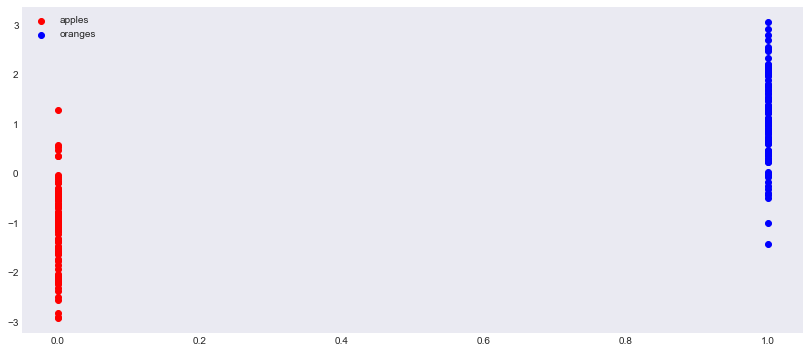

In [119]:
def project_dot_per_sample(X, w):
        p = [np.dot(w, sample) for sample in X.T]
        return np.array(p)
    
def project_sum_prod_per_samle(X, w):
    p = []
    for sample in X.T:
        sp = 0
        for els, elw in zip(sample, w):
            sp += els * elw
            p.append(sp)
    return np.array(p)

def project_matrix_op(X,w):
    return w @ X # @ operation only available for Python3, potentially fastest
    
w = [-1.05,  2.183,  2.171]
p1 = project_dot_per_sample(xc, w)
p2 = project_sum_prod_per_samle(xc, w)
p3 = project_matrix_op(xc, w)

# Check to see all yield equal results
print(np.all(p1==p2))
print(np.all(p1==p3))
print(np.all(p2==p3))

plt.scatter(y[y==0], p1[y==0], c='r', label='apples')
plt.scatter(y[y==1], p1[y==1], c='b', label='oranges')
plt.legend()
plt.show()

/Users/MATEO./opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/MATEO./opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


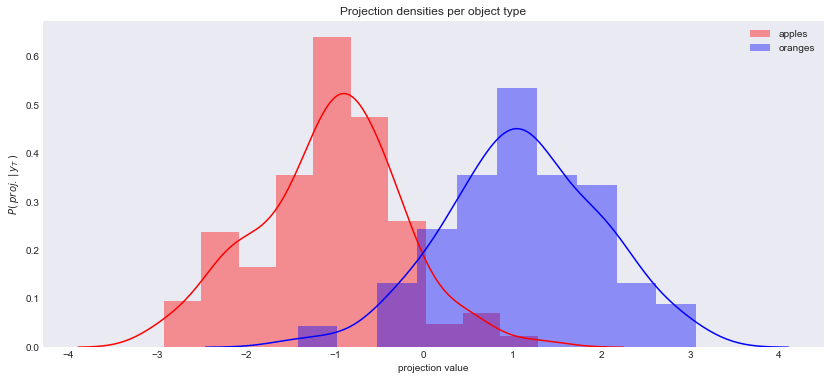

In [120]:
ax = sns.distplot(p1[y==0], label='apples', color='red')
ax = sns.distplot(p1[y==1], ax=ax, label='oranges', color='blue')
ax.set_xlabel('projection value')
ax.set_ylabel('$P(\\;proj. \\, | \\, y_T\\; )$')
ax.set_title('Projection densities per object type')
plt.legend()
plt.show()

(256, 512)
[[159 147 149 ... 149 143 122]
 [157 143 143 ... 123 142 139]
 [140 144 158 ... 110 123 126]
 ...
 [ 99  70  76 ... 100 102 132]
 [ 71  62  74 ... 104 107 140]
 [128 132 142 ... 105 108 147]]


Text(0.5, 1.0, 'image pixel matrix')

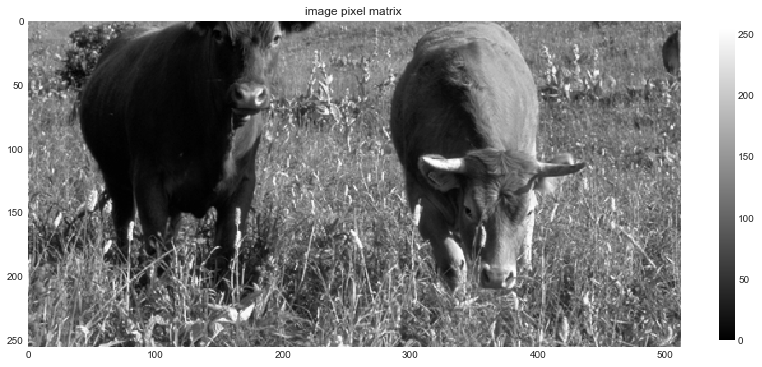

In [124]:
natimg = plt.imread('natIMG.jpeg')
print(natimg.shape)
print(natimg)

plt.figure()
plt.imshow(natimg, cmap='gray', interpolation='none')
plt.colorbar(fraction=0.02)
plt.title('image pixel matrix')

[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]


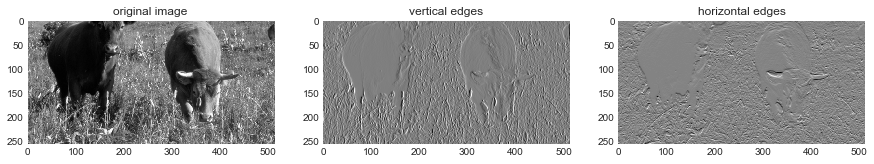

In [129]:
from scipy import signal
width = 3
kernel = np.zeros((width,width))
kernel[:,:int(width/2)] = -1
kernel[int(width/2),:int(width/2)] = -2
kernel[:,int(width/2):] = 1
kernel[int(width/2),int(width/2):] = 2
kernel[:,int(width/2)] = 0
print(kernel)
response_v = signal.convolve2d(natimg/255., kernel, boundary='symm', mode='same')
response_h = signal.convolve2d(natimg/255., kernel.T, boundary='symm', mode='same')

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,3))
ax1.imshow(natimg, cmap='gray', interpolation='none')
ax1.set_title("original image")
ax2.imshow(response_v, cmap='gray', interpolation='none')
ax2.set_title("vertical edges")
ax3.imshow(response_h, cmap='gray', interpolation='none')
ax3.set_title("horizontal edges")
plt.show()